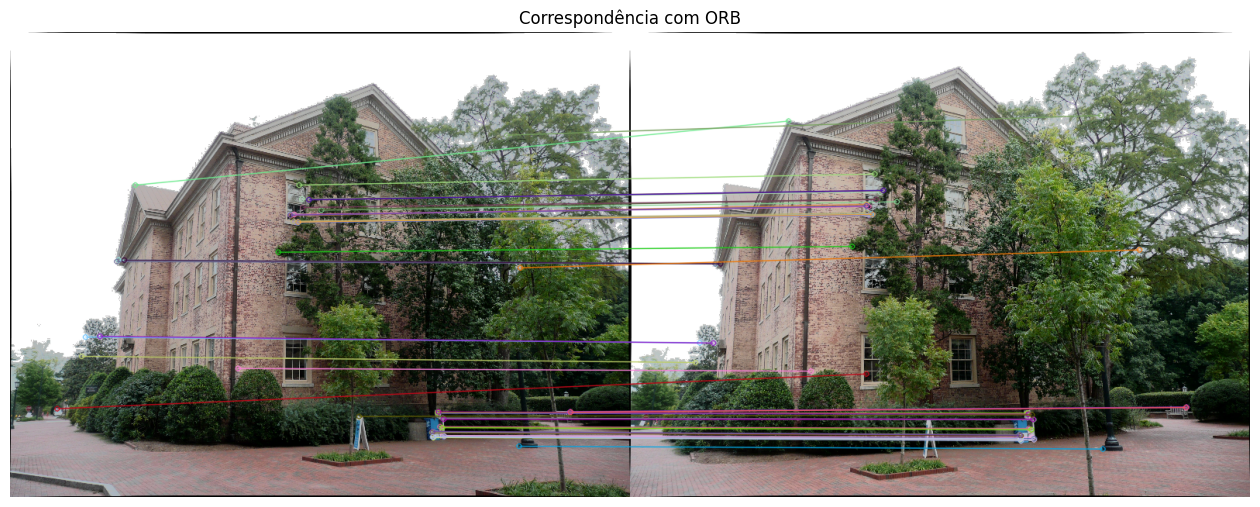

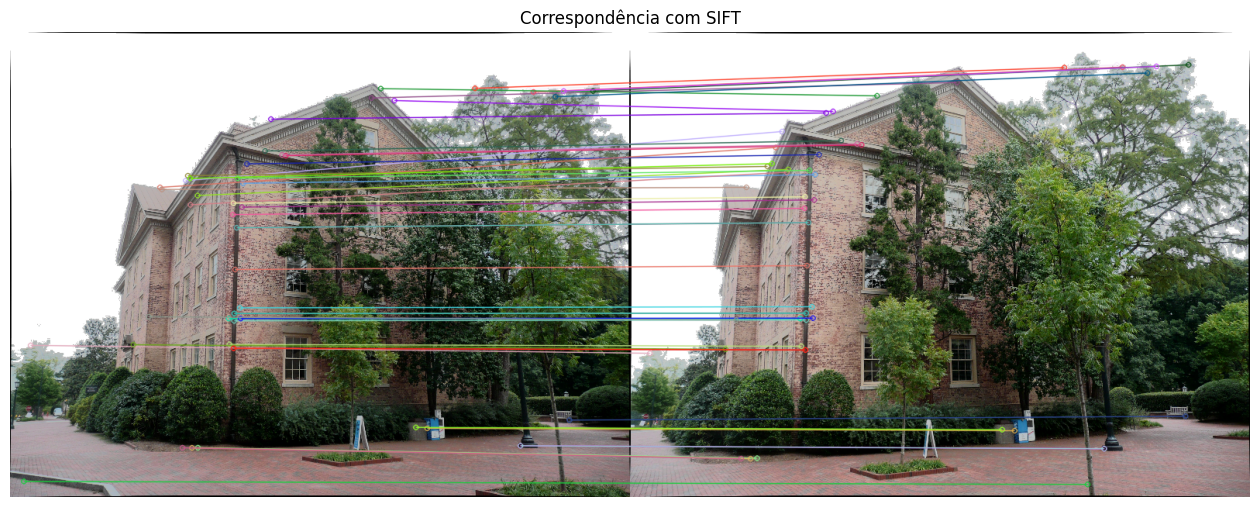

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from src import preprocessamento
from src.deteccaopontos import deteccao_pontos

K = np.array([
    [2559.68, 0, 1536],
    [0, 2559.68, 1152],
    [0, 0, 1]
], dtype=np.float32)

dist = np.array([-0.0204997, 0, 0, 0, 0], dtype=np.float32)

img1_path = "/home/kaiooliveira/Documentos/kaio/dev/Fotogrametria/fotogrametria_aplicada/data/bruto/south-building/images/P1180141.JPG"
img2_path = "/home/kaiooliveira/Documentos/kaio/dev/Fotogrametria/fotogrametria_aplicada/data/bruto/south-building/images/P1180143.JPG"

# Pré processamento das imagens
img1 = preprocessamento.processar_imagem(img1_path, K, dist)
img2 = preprocessamento.processar_imagem(img2_path, K, dist)

# ORB

kp1_orb, desc1_orb = deteccao_pontos.detectar_pontos(img1, metodo="ORB")
kp2_orb, desc2_orb = deteccao_pontos.detectar_pontos(img2, metodo="ORB")
matches_orb = deteccao_pontos.corresponder_descritores(desc1_orb, desc2_orb, metodo="BF")
img_orb_matches = deteccao_pontos.desenhar_matches(img1, kp1_orb, img2, kp2_orb, matches_orb)

# Visualização do ORB
plt.figure(figsize=(16, 8))
plt.title("Correspondência com ORB")
plt.imshow(cv2.cvtColor(img_orb_matches, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

# ===== SIFT ======
kp1_sift, desc1_sift = deteccao_pontos.detectar_pontos(img1, metodo="SIFT")
kp2_sift, desc2_sift = deteccao_pontos.detectar_pontos(img2, metodo="SIFT")
matches_sift = deteccao_pontos.corresponder_descritores(desc1_sift, desc2_sift, metodo="BF")
img_sift_matches = deteccao_pontos.desenhar_matches(img1, kp1_sift, img2, kp2_sift, matches_sift)

# Visualização do SIFT
plt.figure(figsize=(16, 8))
plt.title("Correspondência com SIFT")
plt.imshow(cv2.cvtColor(img_sift_matches, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()